In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

###  Data Cleaning 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis= 1, inplace =True)

In [7]:
df.sample(5)

,v1,v2
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...
676,ham,Maybe?! Say hi to and find out if got his ca...
4468,ham,"Nothing, smsing u n xy lor. Sorry lor da guys ..."
2780,ham,Long after I quit. I get on only like 5 minute...
3082,ham,K..k:)how about your training process?


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df= df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

### EDA

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

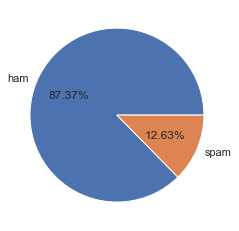

In [17]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f%%')
plt.show()

In [18]:
import nltk

In [19]:
# nltk.download('punkt')

In [20]:
df['num_ch'] = df['text'].apply(lambda x:len(x))

In [21]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head(2)

,target,text,num_ch,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [23]:
df['num_sent']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head(2)

,target,text,num_ch,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


<Figure size 1080x540 with 0 Axes>

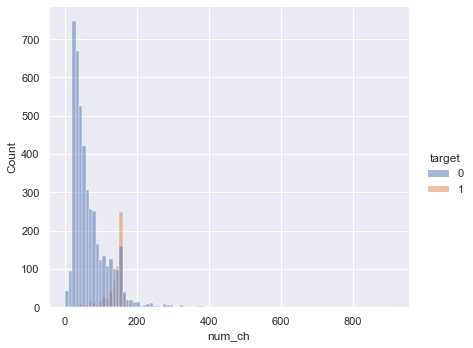

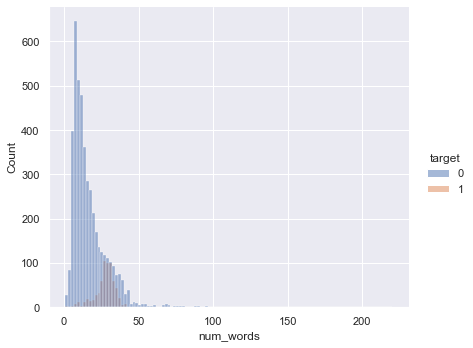

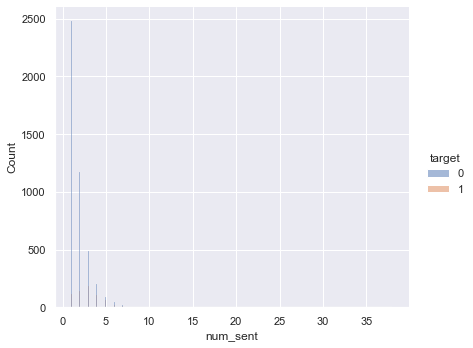

In [25]:
plt.figure(figsize=(12,6), dpi=90)
sns.displot(data=df, x="num_ch", hue="target", aspect=1.2)
sns.displot(data=df, x="num_words", hue="target", aspect=1.2)
sns.displot(data=df, x="num_sent", hue="target", aspect=1.2)
plt.show()

In [26]:
df[['num_ch','num_words','num_sent']].describe()

,num_ch,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
## NonSpam
df[df['target']==0][['num_ch','num_words','num_sent']].describe()

,num_ch,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
## Spam
df[df['target']==1][['num_ch','num_words','num_sent']].describe()

,num_ch,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


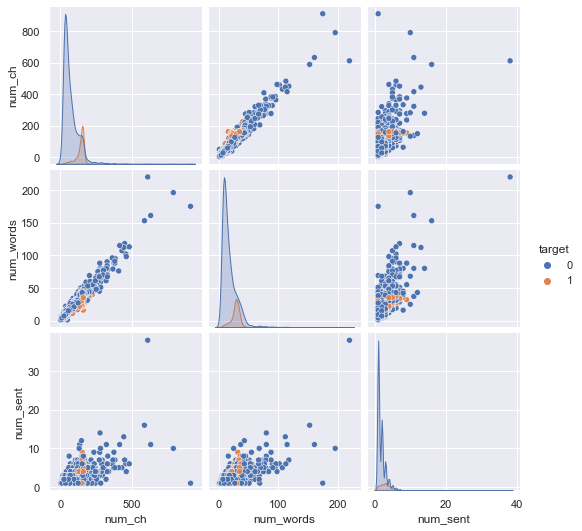

In [29]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

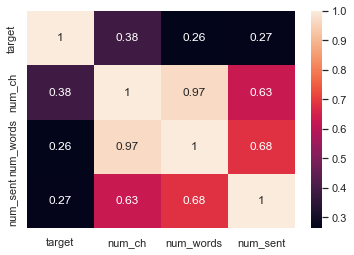

In [30]:
sns.heatmap(df.corr(),annot=True)

### Data Preprocessing

In [31]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [34]:
def transform_stem(text):
    text = text.lower() # converting to lower
    text = nltk.word_tokenize(text) # tokenizing the words
    
    y = []
    for i in text:
        if i.isalnum(): # removing special charaters
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [35]:
print(df['text'][2])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [36]:
transform_stem("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18'

In [37]:
for i in df["text"][:10]:
      print(transform_stem(i))

go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
u dun say earli hor u c alreadi say
nah think goe usf live around though
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
even brother like speak treat like aid patent
per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030


In [38]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

In [39]:
def transform_lema(text):
    text = text.lower() # converting to lower
    text = nltk.word_tokenize(text) # tokenizing the words
    
    y = []
    for i in text:
        if i.isalnum(): # removing special charaters
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(lm.lemmatize(i))
    
            
    return " ".join(y)

In [40]:
for i in df["text"][:10]:
      print(transform_lema(i))

go jurong point crazy available bugis n great world la e buffet cine got amore wat
ok lar joking wif u oni
free entry 2 wkly comp win fa cup final tkts 21st may text fa 87121 receive entry question std txt rate c apply 08452810075over18
u dun say early hor u c already say
nah think go usf life around though
freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send rcv
even brother like speak treat like aid patent
per request melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune
winner valued network customer selected receivea prize reward claim call claim code kl341 valid 12 hour
mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030


In [41]:
df['transform_stem']= df['text'].apply(transform_stem)

In [42]:
df['transform_lema']= df['text'].apply(transform_lema)

In [43]:
df.head()

,target,text,num_ch,num_words,num_sent,transform_stem,transform_lema
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think go usf life around though


In [44]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

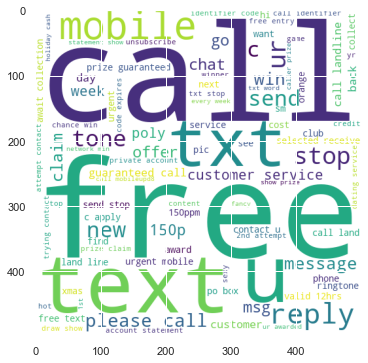

In [45]:
spam_wc = wc.generate(df[df['target']==1]['transform_lema'].str.cat(sep=' '))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

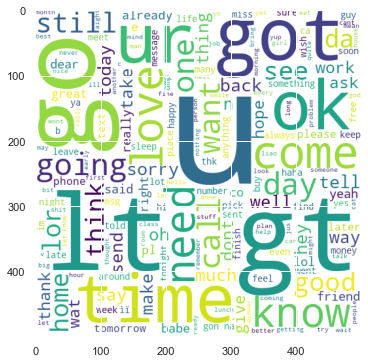

In [46]:
nonspam_wc = wc.generate(df[df['target']==0]['transform_lema'].str.cat(sep=' '))
plt.figure(figsize=(15,6))
plt.imshow(nonspam_wc)

In [47]:
spam_corpus = []
for msg in df[df['target']==1]['transform_lema'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

9939

In [49]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 313),
 ('free', 191),
 ('2', 155),
 ('txt', 130),
 ('u', 126),
 ('text', 121),
 ('ur', 119),
 ('mobile', 114),
 ('stop', 104),
 ('claim', 98),
 ('reply', 97),
 ('4', 97),
 ('prize', 82),
 ('c', 80),
 ('get', 70),
 ('new', 64),
 ('service', 64),
 ('tone', 63),
 ('send', 58),
 ('urgent', 57),
 ('nokia', 54),
 ('phone', 52),
 ('cash', 51),
 ('contact', 51),
 ('week', 49),
 ('please', 49),
 ('win', 48),
 ('min', 45),
 ('customer', 42),
 ('guaranteed', 42)]

G:\Anaconda_Installed\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


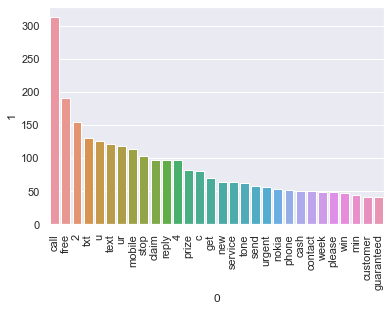

In [50]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
nonspam_corpus = []
for msg in df[df['target']==0]['transform_lema'].tolist():
    for word in msg.split():
        nonspam_corpus.append(word)

In [52]:
Counter(nonspam_corpus).most_common(30)

[('u', 935),
 ('get', 304),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('go', 267),
 ('got', 236),
 ('know', 233),
 ('come', 226),
 ('like', 224),
 ('ok', 215),
 ('time', 213),
 ('good', 213),
 ('ur', 197),
 ('call', 194),
 ('day', 190),
 ('want', 179),
 ('love', 178),
 ('need', 166),
 ('one', 165),
 ('going', 164),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('still', 143),
 ('da', 142),
 ('see', 135),
 ('think', 130),
 ('r', 128),
 ('back', 127)]

G:\Anaconda_Installed\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


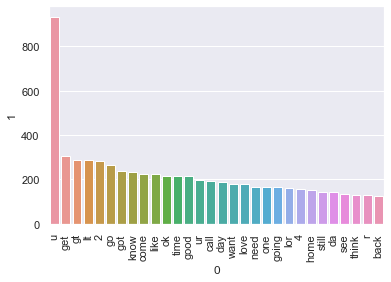

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(nonspam_corpus).most_common(30))[0],pd.DataFrame(Counter(nonspam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Model Building

In [56]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tf = TfidfVectorizer()

In [57]:
vector_txt = tf.fit_transform(df['transform_lema'])

In [58]:
vector_txt.toarray().shape

(5169, 7490)

In [59]:
x =vector_txt.toarray()
y = df['target']

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [61]:
# Navie Bayes Models
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
#Evalutaion metrics
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, classification_report

In [62]:
# creating a dictionary to keep records
results = dict()
results['Algorithm']=[]
results['Accuracy']=[]
results['Precision']=[]

In [63]:
for i in [ BernoulliNB(), MultinomialNB(), GaussianNB()]:
    model = i.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    con_m = confusion_matrix(y_test,y_pred)
    c_r = classification_report(y_test,y_pred)
    p_s = precision_score(y_test,y_pred)
    print(f"Algo: {i}")
    print(f"Acc : {acc}\n")
    print("-"*55)
    print(f"{con_m}\n")
    print("-"*55)
    print(f"{c_r}\n")
    print(f"-"*55)
    print(f"pre: {p_s}\n")
    print(f"*"*55)
    results["Algorithm"].append(i)
    results['Accuracy'].append(acc)
    results['Precision'].append(p_s)

Algo: BernoulliNB()
Acc : 0.9690522243713733

-------------------------------------------------------
[[893   3]
 [ 29 109]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.79      0.87       138

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034


-------------------------------------------------------
pre: 0.9732142857142857

*******************************************************
Algo: MultinomialNB()
Acc : 0.9535783365570599

-------------------------------------------------------
[[896   0]
 [ 48  90]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       896
           1       1.00      0.65      0.79       138

    a

In [64]:
# Ensembling technique
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier

In [63]:
for i in [ExtraTreesClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]:
    model = i.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    con_m = confusion_matrix(y_test, y_pred)
    c_r = classification_report(y_test, y_pred)
    p_s = precision_score(y_test, y_pred)
    print(f"Algo: {i}")
    print(f"Acc : {acc}\n")
    print("-"*55)
    print(f"{con_m}\n")
    print("-"*55)
    print(f"{c_r}\n")
    print(f"-"*55)
    print(f"pre: {p_s}\n")
    print(f"*"*55)
    results["Algorithm"].append(i)
    results['Accuracy'].append(acc)
    results['Precision'].append(p_s)

Algo: ExtraTreesClassifier()
Acc : 0.9758220502901354

-------------------------------------------------------
[[894   2]
 [ 23 115]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       0.98      0.83      0.90       138

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.94      1034
weighted avg       0.98      0.98      0.97      1034


-------------------------------------------------------
pre: 0.9829059829059829

*******************************************************
Algo: RandomForestClassifier()
Acc : 0.9738878143133463

-------------------------------------------------------
[[896   0]
 [ 27 111]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       1.00      0.80      0.8

In [65]:
# MultinomialNB
model1 = MultinomialNB()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
acc = accuracy_score(y_test, y_pred)
con_m = confusion_matrix(y_test, y_pred)
c_r = classification_report(y_test, y_pred)
p_s = precision_score(y_test, y_pred)
print(f"Algo: {model1}")
print(f"Acc : {acc}\n")
print("-"*55)
print(f"{con_m}\n")
print("-"*55)
print(f"{c_r}\n")
print(f"-"*55)
print(f"pre: {p_s}\n")
print(f"*"*55)

Algo: MultinomialNB()
Acc : 0.9535783365570599

-------------------------------------------------------
[[896   0]
 [ 48  90]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       896
           1       1.00      0.65      0.79       138

    accuracy                           0.95      1034
   macro avg       0.97      0.83      0.88      1034
weighted avg       0.96      0.95      0.95      1034


-------------------------------------------------------
pre: 1.0

*******************************************************


In [66]:
# RandomForest
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
acc = accuracy_score(y_test, y_pred)
con_m = confusion_matrix(y_test, y_pred)
c_r = classification_report(y_test, y_pred)
p_s = precision_score(y_test, y_pred)
print(f"Algo: {model2}")
print(f"Acc : {acc}\n")
print("-"*55)
print(f"{con_m}\n")
print("-"*55)
print(f"{c_r}\n")
print(f"-"*55)
print(f"pre: {p_s}\n")
print(f"*"*55)

Algo: RandomForestClassifier()
Acc : 0.9748549323017408

-------------------------------------------------------
[[896   0]
 [ 26 112]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       1.00      0.81      0.90       138

    accuracy                           0.97      1034
   macro avg       0.99      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034


-------------------------------------------------------
pre: 1.0

*******************************************************


In [67]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(model1,open('model.pkl','wb'))